#                             Project 2:    Investigate a Dataset  --Titanic Dataset  

##### Sheena Yu

# I. Background Information

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# II. Research Questions

**1. According to the age distribution of passengers in this dataset, which age groups have a higher survival rate?**

**2. What is the relationship between family size (total number of siblings, spouse, parents, children) and the corresponding survival rate?**

**3. Do groups of passengers share similar survival rates, if we divide the total passengers on board into groups based on sex and class?**

# III. Data Wrangling

### Data Overview

VARIABLE DESCRIPTIONS:

**survival: **        Survival (0 = No; 1 = Yes)      
**pclass: **          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                  
**name: **            Name   
**sex: **             Sex   
**age: **             Age   
**sibsp: **           Number of Siblings/Spouses Aboard   
**parch: **           Number of Parents/Children Aboard   
**ticket: **          Ticket Number   
**fare: **            Passenger Fare   
**cabin: **           Cabin   
**embarked: **        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)   

SPECIAL NOTES:

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

### Read Titantic dataset

In [316]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [318]:
# Import Python packages that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [319]:
# Read titanic data and store it as Pandas Dataframe
titanic_df = pd.read_csv('titanic-data.csv')

# Check what the dataset look like
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Investigate and clean Titanic dataset

+ **1. Missing values**

In [320]:
# check the data type of each column
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [321]:
print titanic_df['Age'].isnull().value_counts()
print titanic_df['Cabin'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64


From the information above, we notice that there are two fields containing missing values, *Age* and *Cabin*.

*Cabin*: Since around only 23% data of the *Cabin* column is non-null and we are not going to investigate deeper about this data, we then decide to drop this column. 

*Age*: We will have to use age information to identify different groups of passengers, substituting null values with meaningful values(eg. Median) is our way of dealing with missing values.

In [323]:
# Get titles of passengers
import re

def extract_title(string_name):
    pattern_condition = re.search('.*?,(.*?)\.', string_name)
    if bool(pattern_condition):
        return pattern_condition.group(1).strip()
    else:
        return None

# Append a new column named 'Titles' to the original titanic dataset
titanic_df['Titles'] = titanic_df['Name'].map(extract_title)

# Drop any row where both Age and Titles contain null values, if exists
titanic_df = titanic_df[pd.notnull(titanic_df[['Age', 'Titles']].all(axis=1))]

# View top rows of the edited new dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [325]:
# Fill null values in the 'Age' column with corresponding median values of each title group
titanic_df['Age'].fillna(titanic_df.groupby('Titles')['Age'].transform('median'), inplace=True)

# Check again for the count of non-null value in 'Age' column
len(titanic_df['Age'].notnull())

891

For now, we have filled null values in the 'Age' column with corresponding median values of each title group, so that we can do our best to mitigate the effect of biased age values.

+ **2. Drop unused columns**

Next, we are going to drop columns which will not be used in our analysis here. 

Columns to be dropped are *Name*, *Ticket*, *Fare*, *Cabin*, *Embarked*.

In [326]:
# Drop five columns
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Titles
0,1,0,3,male,22.0,1,0,Mr
1,2,1,1,female,38.0,1,0,Mrs
2,3,1,3,female,26.0,0,0,Miss
3,4,1,1,female,35.0,1,0,Mrs
4,5,0,3,male,35.0,0,0,Mr


+ **3. Add new column**

In [327]:
# Family size

# Add a column called family size which is the sum of SibSp and Parch
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Titles,FamilySize
0,1,0,3,male,22.0,1,0,Mr,1
1,2,1,1,female,38.0,1,0,Mrs,1
2,3,1,3,female,26.0,0,0,Miss,0
3,4,1,1,female,35.0,1,0,Mrs,1
4,5,0,3,male,35.0,0,0,Mr,0


# IV. Data Exploration

### 1. According to the age distribution of passengers in this dataset, which age groups have a higher survival rate?

In [328]:
# Identify the min and max age 
min_age = titanic_df['Age'].min()
max_age = titanic_df['Age'].max()

print 'The ages of passengers range from ',min_age, 'to ', max_age 

The ages of passengers range from  0.42 to  80.0


In [330]:
# Split Titanic dataset into two groups: survived and dead
survived_df = titanic_df[titanic_df['Survived']==1]
dead_df = titanic_df[titanic_df['Survived']==0]

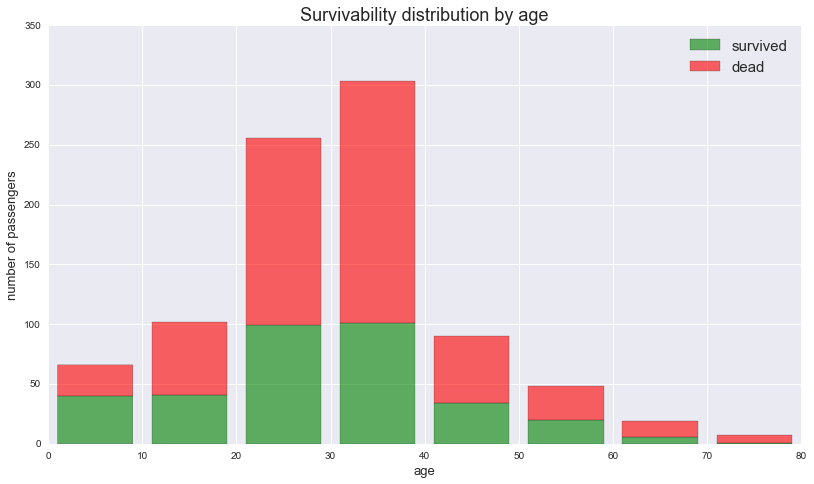

In [332]:
# Create a histogram to show survivability distribution by age

plt.hist([survived_df['Age'],dead_df['Age']],
          bins=8, range=(0,80), stacked=True, color = ['g','r'], alpha=0.6, label=['survived', 'dead'])
plt.title('Survivability distribution by age', fontsize=18)
plt.xlabel('age', fontsize=13)
plt.ylabel('number of passengers', fontsize=13)
plt.legend(fontsize=15)
plt.gcf().set_size_inches(13.5, 7.5)
plt.show()

According the histogram, we can see that the majority of passengers on board are between 20 to 40 years old, while people older than 60 account for only a small proportion of the total passengers.

Each bar of the histogram is divided into two parts: red and green. The red part represents passengers of that age range who didn't survived in the tragedy, and the green part represents passengers who survived. Apparently chidren under 10 has the highest survival rate. So next we will take a deeper look at survivability distribution by calculating reliable statistics (survival rates).

In [335]:
# Calculate percentages of the survived vesus dead for each age group

from decimal import Decimal

def subset_dataset_by_age(lower_bound, upper_bound):
    age = titanic_df['Survived'][(titanic_df['Age']>lower_bound) & (titanic_df['Age']<=upper_bound)]
    return age.values.astype(float)

survival_rate_by_age = []
for i in xrange(0,80,10):
    age_range = subset_dataset_by_age(i, i+10)
    survival_rate_by_age.append(round((sum(age_range)/len(age_range)), 2))

survival_rate_by_age

[0.59, 0.38, 0.31, 0.48, 0.38, 0.4, 0.24, 0.2]

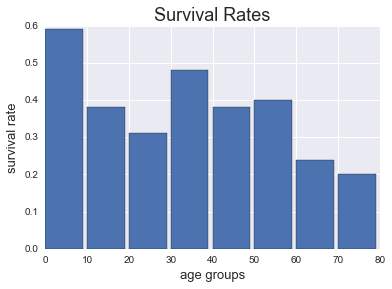

In [337]:
# Create a var plot to visually display the survival rate of each age group

fig, ax = plt.subplots()
ax.bar(range(0,80,10),survival_rate_by_age, width=9)
ax.set_title('Survival Rates', fontsize=18)
ax.set_xlabel('age groups', fontsize=13)
ax.set_ylabel('survival rate', fontsize=13)

From the plot above, we can clearly see that children between 0 to 10 years old have the highest survival rate (59%). The second-highest group is people of ages between 30 to 40 (48%). The elder people have the lowest chance of survival.

### 2. What is the relationship between family size (total number of siblings, spouse, parents, children) and the corresponding survival rate?

In [343]:
# Group Titanic dataset by 'Survived' and 'FamilySize'   
survived_by_familysize = titanic_df.groupby(['Survived', 'FamilySize']).size().reset_index(name='Count')
survived_by_familysize.head()

,Survived,FamilySize,Count
0,0,0,374
1,0,1,72
2,0,2,43
3,0,3,8
4,0,4,12


In [344]:
def subset_familysize_df(survived, field):
    return survived_by_familysize[survived_by_familysize['Survived']==survived][field]

dead_familysize = subset_familysize_df(0, 'FamilySize')
dead_familysize_count = subset_familysize_df(0, 'Count')

survived_familysize = subset_familysize_df(1, 'FamilySize')
survived_familysize_count = subset_familysize_df(1, 'Count')

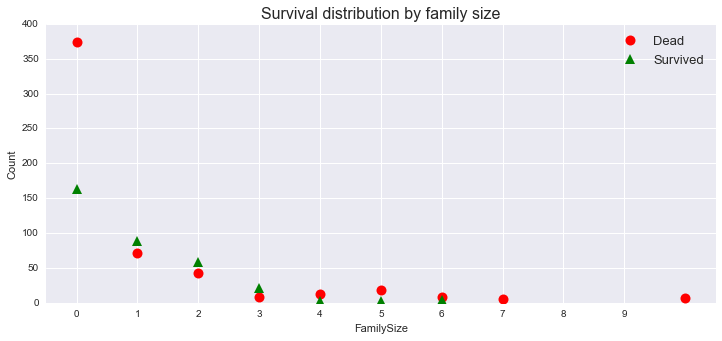

In [345]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(dead_familysize, dead_familysize_count, 'ro', markersize=10)
plt.plot(survived_familysize, survived_familysize_count, 'g^', markersize=10)
plt.xlim(-0.5, 10.5)
plt.legend(['Dead', 'Survived'], loc='best', fontsize=13)

ax.set_ylabel('Count')
ax.set_xlabel('FamilySize')
ax.set_title('Survival distribution by family size', fontsize=16)
ax.set_xticks([p for p in xrange(max(dead_familysize))])

plt.show()

Surprsingly, we find that only passengers having family size of 1 to 3 who survived outnumbered those who did not. For passengers who's alone aboard，most of them didn't survive. The same situation applies to passengers who have family size no less than 4. 

So passengers with a relatively small family size (1, 2, 3) are more likely to survive.

### 3. Do groups of passengers share similar survival rates, if we divide the total passengers on board into groups based on sex and class?

In [346]:
# Group data by Pclass, Sex and Survived
survived_by_class_sex_survived = titanic_df.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name="Count")

# Split the grouped data by sex
survived_female = survived_by_class_sex_survived[survived_by_class_sex_survived['Sex']=='female']
survived_male = survived_by_class_sex_survived[survived_by_class_sex_survived['Sex']=='male']
print survived_female
print survived_male

   Pclass     Sex  Survived  Count
0       1  female         0      3
1       1  female         1     91
4       2  female         0      6
5       2  female         1     70
8       3  female         0     72
9       3  female         1     72
    Pclass   Sex  Survived  Count
2        1  male         0     77
3        1  male         1     45
6        2  male         0     91
7        2  male         1     17
10       3  male         0    300
11       3  male         1     47


(-0.2, 2.8)

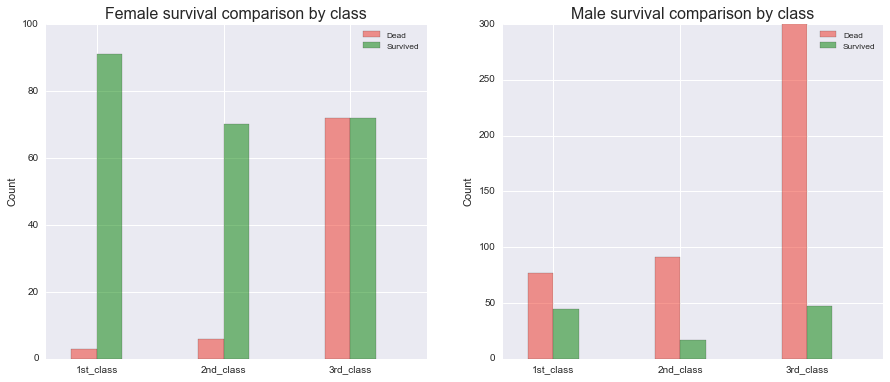

In [347]:
# Create bar plots to show the survivability distribution among passenger classes by sex

# Set position, bar width, and plot grid
pos = list(range(len(titanic_df['Pclass'].unique())))
width = 0.2
plot_rows = 1
plot_cols = 2

# Plotting the bars
fig = plt.figure(figsize=(15, 6))

ax1 = plt.subplot2grid((plot_rows,plot_cols), (0,0), rowspan=1, colspan=1)
plt.bar(pos, survived_female[survived_female['Survived']==0]['Count'], width, alpha=0.5, color='#EE3224',
        label=survived_female[survived_female['Survived']==0]['Pclass'])
plt.bar([p+width for p in pos], survived_female[survived_female['Survived']==1]['Count'], width, alpha=0.5, color='g',
        label=survived_female[survived_female['Survived']==1]['Pclass'])
plt.legend(['Dead', 'Survived'], loc='best', fontsize='small')

ax1.set_ylabel('Count')
ax1.set_title('Female survival comparison by class', fontsize=16)
ax1.set_xticks([p + width for p in pos])
ax1.set_xticklabels(['1st_class', '2nd_class', '3rd_class'])
plt.xlim(min(pos)-width, max(pos)+width*4)

ax2 = plt.subplot2grid((plot_rows,plot_cols), (0,1), rowspan=1, colspan=1)
plt.bar(pos, survived_male[survived_male['Survived']==0]['Count'], width, alpha=0.5, color='#EE3224',
        label=survived_male[survived_male['Survived']==0]['Pclass'])
plt.bar([p+width for p in pos], survived_male[survived_male['Survived']==1]['Count'], width, alpha=0.5, color='g',
        label=survived_male[survived_male['Survived']==1]['Pclass'])
plt.legend(['Dead', 'Survived'], loc='best', fontsize='small')

ax2.set_ylabel('Count')
ax2.set_title('Male survival comparison by class', fontsize=16)
ax2.set_xticks([p + width for p in pos])
ax2.set_xticklabels(['1st_class', '2nd_class', '3rd_class'])
plt.xlim(min(pos)-width, max(pos)+width*4)

It's quite obvious and clear that female passengers have a higher chance of survival, especially those who were in the first and second class. However, there are always more male passengers who didn't survive than those who did, regardless of which class they were in. From this point, we can briefly conclude that female were given the priority to board on lifeboats. But we are more interested in addressing this issue further using inference statistics.

### Chi-Square Goodness of Fit Test

To answer this question, we decide to conduct **chi-square goodness of fit test**, which is a common statistical test for categorical variables and is used to determine whether sample data are consistent with a hypothesized distribution.

The categorical variables are *class* and *sex*.

##### Hypotheses:

$H_0$: The survivors in each group (1st class female, 1st class male, 2nd class female, 2nd class male, 3rd class female, 3rd class male) are a simple random sample from the population of passengers on Titanic. The observed counts of survivors from various groups follow the same sex and class distribution in the population.

$H_A$: The survivors in each group (1st class female, 1st class male, 2nd class female, 2nd class male, 3rd class female, 3rd class male) are **not** a simple random sample from the population of passengers on Titanic. The observed counts of survivors from various groups **DO NOT** follow the same sex and class distribution in the population.

$H_0$ refers to Null Hypothesis, and the small zero stands for *null*.  $H_A$ refers to Alternative Hypothesis, and the small `A` stands for *Alternative*.


##### Analyze Sample Data:

In [349]:
# First, we calculate the expected survival rate within each group based on the Titanic dataset.
survived_by_class_sex = titanic_df.groupby(['Pclass', 'Sex']).size().reset_index(name="Count")
total_passengers = sum(survived_by_class_sex['Count'])

# Store the results in a new column
survived_by_class_sex['Percent_of_population'] = survived_by_class_sex['Count']/total_passengers

In [350]:
# Calculate expected survivors
total_survivors = sum(titanic_df['Survived'])
survived_by_class_sex['Expected_Survivors'] = (survived_by_class_sex['Percent_of_population'] * total_survivors).round(0)

# Get observed survivors
survived_by_class_sex['Observed_Survivors'] = survived_by_class_sex_survived[survived_by_class_sex_survived['Survived']==1]['Count'].values

In [352]:
# Data ready for the test
survived_by_class_sex

,Pclass,Sex,Count,Percent_of_population,Expected_Survivors,Observed_Survivors
0,1,female,94,0.105499,36.0,91
1,1,male,122,0.136925,47.0,45
2,2,female,76,0.085297,29.0,70
3,2,male,108,0.121212,41.0,17
4,3,female,144,0.161616,55.0,72
5,3,male,347,0.389450,133.0,47


##### Check Conditions:

+ Independence: Sampled data are independent.

+ Sample Size: Each particular scenario (i.e. cell) has at least five expected cases.

##### Goodness of Fit Test:

+ chi-square statistic: when dealing with counts and investigating how far the observed counts are from the expected counts, we use a new test statistic called
the chi-square ( ${\chi}^2$ ) statistic.

+ Formula:
$${\chi}^2 = \sum_{i=1}^{k}\frac{(O - E)^2}{E}$$

$O$: Observed   
$E$: Expected   
$k$: number of cells/categories

##### Chi-Square Distribution:

+ chi-square distribution has just one parameter, **degree of freedom**. It influences the shape, center and spread of chi-square distribution.

$$df = k - 1$$

+ Plot:


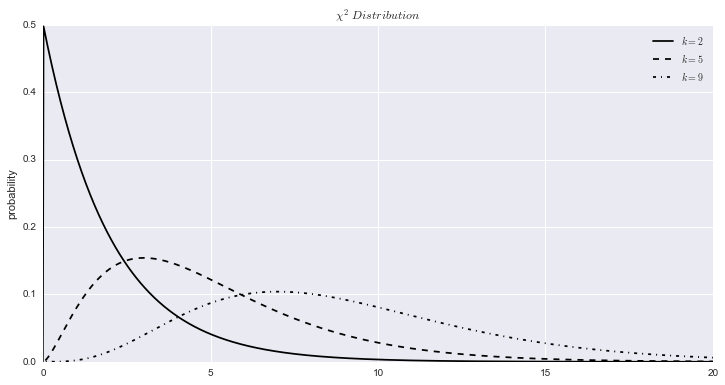

In [313]:
import scipy.stats as stats

# Define the distribution parameters to be plotted
k_values = [2, 5, 9]
linestyles = ['-', '--', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = stats.chi2(k, mu)
    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=r'$k=%i$' % k)

plt.xlim(0, 20)
plt.ylim(0, 0.5)

plt.ylabel(r'probability')
plt.title(r'$\chi^2\ Distribution$')

plt.legend()
plt.show()

In this case, our degree of freedom is 5.    

##### Interpret Results

*Significant Level*: We set our significant level at 0.05 in this case.

First, we calculate the critical value using SciPy.

In [314]:
# 95% confidence level; Df = number of variable categories - 1
crit_value = stats.chi2.ppf(q = 0.95, df = 5)   
print("Critical value")
print(crit_value)

Critical value
11.0704976935


Next, we can carry out chi-square GoF test automatically using SciPy.

In [312]:
stats.chisquare(f_obs= survived_by_class_sex['Observed_Survivors'],   
                f_exp= survived_by_class_sex['Expected_Survivors'])

Power_divergenceResult(statistic=216.99074990087712, pvalue=6.5543307430540403e-45)

P-value for a chi-square test is defined as the tail area above the calculated test statistic, because the test statistic is always positive, a higher test statistic means a higher deviation from the null hypothesis.     

The test statistic ($\chi^2$) is 216.99, a lot larger than the critical value of 11. Thus P-value is extremely close to zero.

$$P(\chi^2 > 216.99) \approx 0$$

**Conclusion: ** Since P-value < 0.05 (significant level), we reject the null hypothesis, and conclude that some factor other than chance is operating for the deviation to be so great. There is little chance that this deviation is due to chance alone. Therefore, other factors must be involved.

Because the observed survial distribution didn't follow the expected distribution based on the actual passengers' distritbuion by class and sex, we are able to get a general sense of how the passengers and crew on Titanic abided by the standard of "Women and children first". Taking just women into consideration, we know that they were given the priority to board lifeboats, especially women in the first and second class. 

# V. References

[Kaggle Titanic Dataset Description](https://www.kaggle.com/c/titanic/data)

[Roy's Titanic Notebook](https://www.kaggle.com/gaohong/titanic/roy-s-titanic-notebook)

[Exploring Titanic Dataset](https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic)

[Python for Data Analysis: Chi-Square Test](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html)

[Chi-Square Distribution Plot](http://www.astroml.org/book_figures/chapter3/fig_chi2_distribution.html)

[SciPy Stats](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.chisquare.html)

[Matplotlib Guidance](http://matplotlib.org)
